In [33]:
from matplotlib import pyplot as plt

import numpy as np

In [34]:
def bartz_h_g(Mach, T_wg, D, P_c, T_0, gamma, mu, Cp, Pr, w, C_star):
    sigma = 1 / ((0.5*(T_wg/T_0)*(1+(gamma-1)/2*Mach**2)+(gamma+1)/2)**(0.8-w/5) * (1+(gamma-1)/2*Mach**2)**(w/5))
    h_g = (0.026 / (D**0.2)) * ((mu**0.2)*(Cp/Pr**0.6)) * ((P_c/C_star)**0.8) *  sigma
    return h_g


In [35]:
# h_g : bartz 식을 통한 가스 열 전달 계수
# w = 물성지수 일반적으로 w = 0.6 사용
#D_t = 목 직경 , R = 곡률반지름


#곡률 반경을 고려한 바츠 eqn , C-D노즐에서 사용가능능
"""
def bartz_h_g(Mach, T_wg, D, P_c, T_0, gamma, mu, Cp, Pr, w, C_star, D_t ,R , A_t , A):
    sigma = 1 / ((0.5*(T_wg/T_0)*(1+(gamma-1)/2*Mach**2)+(gamma+1)/2)**(0.8-w/5) * (1+(gamma-1)/2*Mach**2)**w/5)
    h_g = (0.026 / (D**0.2)) * ((mu**0.2)*(Cp/Pr**0.6)) * ((P_c/C_star)**0.8)*(D_t/R)**0.1*(A_t/A) * sigma
    return h_g
"""


'\ndef bartz_h_g(Mach, T_wg, D, P_c, T_0, gamma, mu, Cp, Pr, w, C_star, D_t ,R , A_t , A):\n    sigma = 1 / ((0.5*(T_wg/T_0)*(1+(gamma-1)/2*Mach**2)+(gamma+1)/2)**(0.8-w/5) * (1+(gamma-1)/2*Mach**2)**w/5)\n    h_g = (0.026 / (D**0.2)) * ((mu**0.2)*(Cp/Pr**0.6)) * ((P_c/C_star)**0.8)*(D_t/R)**0.1*(A_t/A) * sigma\n    return h_g\n'

In [36]:
# h_c : 냉각제의 열전달계수
# k_c (W/m*k) : 냉각제의 열전도율 , D_c 냉각로 직경 , Re_c Pr_c : 냉각제 관한 레이놀즈수, 프란틀 수 


def h_cf(k_c, D_c, Re_c, Pr_c):
    
    
    h_c = 0.023 * k_c / D_c * Re_c **0.8 * Pr_c **0.4

    return h_c

In [37]:
# Coolant에 관한 레이놀즈수, 프란틀 수 뽑아줌
# Cp_c : 냉각제 정압비열, mu_c : 냉각제 점성계수 rho_c : 냉각제 밀도 , u_c : 냉각제 속도도
def Coolant_cal(k_c , Cp_c, mu_c, rho_c, u_c, D_c):

    Re_c = (rho_c * u_c * D_c)/ mu_c

    Pr_c = (Cp_c * mu_c)/ k_c

    return Re_c , Pr_c

In [38]:
# T_aw : 열 손실이 전혀 없는 벽에 고온 유동이 접했을 때, 벽 표면이 도달하게 되는 유동의 경계층 온도

def T_aw(Pr_gas, Mach_gas, T_0, gamma):

  T_aw = T_0 * (1 + (Pr_gas**(1/3)) * ((gamma - 1) / 2) * (Mach_gas**2)) / (1 + ((gamma - 1) / 2) * (Mach_gas**2))

  return T_aw

In [58]:
# T_wg : 가스 쪽 벽면 온도

def T_wgf(q_conv, T_wc, Wall_Thick, K_w):
  T_wg = T_wc + (Wall_Thick * q_conv / (2 * K_w))
  return T_wg

In [40]:
def qconv_h(T_aw, T_wg, h_g):

  qconv_h = h_g* (T_aw -T_wg)

  return qconv_h



In [41]:
#특성 속도
def C_star(P_0 , A_t , m_dot):

    

    return (P_0 * A_t) / m_dot

In [75]:
# 기초 설정(가스 성분)


# 가스 관련 성분
Pr_gas = 0.8     #가스의 Pr계수
Mach_gas = 1     #가스의 마하수
Cp_gas = 2289.3     #가스의 정압비열
T_0 = 2981.22     #가스의 전온도 [K]
P_0 = 20e5        #가스의 전압력 [pa]
Gamma = 1.2107      #가스의 비열비 
M_dot = 0.45      #가스의 질유량
Mu = 7.78e-05         #가스의 점성계수
w = 0.6          #물성지수성지수



#구조 성분

Wall_Thick = 0.5*1e-3 #[m]
k_w = 120             #벽 열전도율

#area = 1.398e-3     #[m^2]
D_t = 19.8e-3 # 목 직경
A_t = (np.pi * D_t**2)/4    # 목 면적
R = 0             #곡률반지름



D_c = 2e-3          # 냉각유로 직경[m]


#냉각제 성분

#T_c = 291.7           # 냉각제 입구 온도 (초기)
k_c = 0.6            # 냉각제 열전도율

Cp_c = 2289         # 냉각제 정압비열  [J/kg·K]
Mu_c = 20.869e-6          # 냉각제 점성계수
Rho_c = 958.4         # 냉각제 밀도
U_c = 30            # 냉각제 속도
M_dot_c = U_c * Rho_c * (np.pi * D_c**2)/4     # 냉각제 질량유량 [kg/s]

In [43]:
print(M_dot_c)

0.09032707197601372


In [44]:
#초기 설정값(실행관련 성분)

         #[K] 초기 설정값

tol = 1e-3          #열전달 계수 오차
max_iter = 1000      #열 전달계수 반복 계산
alpha = 0.2         #수렴 계수

T_aw=2877 K, h_g=6282 W/m2K, q=16505.3 kW/m2
[SUMMARY] x_idx=  0, x=0.000 m, T_wg=441.7K, T_c=291.7K, q=15432.2kW/m², T_aw=2877.2
[SUMMARY] x_idx=  1, x=0.000 m, T_wg=441.8K, T_c=291.8K, q=15431.4kW/m², T_aw=2877.2
[SUMMARY] x_idx=  2, x=0.000 m, T_wg=441.9K, T_c=291.9K, q=15430.6kW/m², T_aw=2877.2
[SUMMARY] x_idx=  3, x=0.001 m, T_wg=442.0K, T_c=292.0K, q=15429.8kW/m², T_aw=2877.2
[SUMMARY] x_idx=  4, x=0.001 m, T_wg=442.1K, T_c=292.1K, q=15429.0kW/m², T_aw=2877.2
[SUMMARY] x_idx=  5, x=0.001 m, T_wg=442.2K, T_c=292.2K, q=15428.2kW/m², T_aw=2877.2
[SUMMARY] x_idx=  6, x=0.001 m, T_wg=442.3K, T_c=292.3K, q=15427.4kW/m², T_aw=2877.2
[SUMMARY] x_idx=  7, x=0.001 m, T_wg=442.4K, T_c=292.4K, q=15426.6kW/m², T_aw=2877.2
[SUMMARY] x_idx=  8, x=0.002 m, T_wg=442.5K, T_c=292.5K, q=15425.8kW/m², T_aw=2877.2
[SUMMARY] x_idx=  9, x=0.002 m, T_wg=442.5K, T_c=292.5K, q=15425.0kW/m², T_aw=2877.2
[SUMMARY] x_idx= 10, x=0.002 m, T_wg=442.6K, T_c=292.6K, q=15424.1kW/m², T_aw=2877.2
[SUMMARY] x_idx= 11,

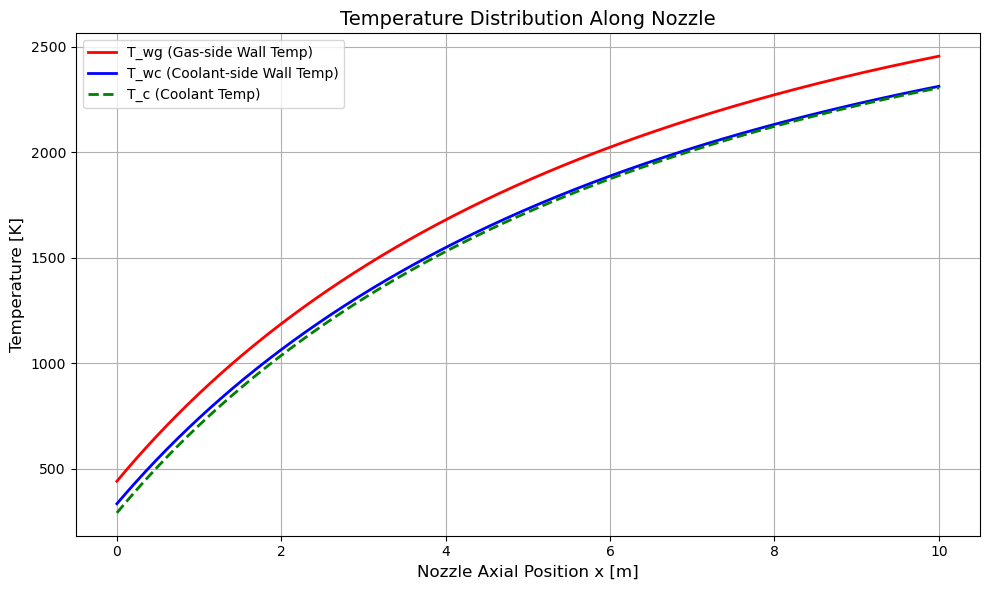

In [86]:
T_c_init = 291.7     # 냉각제 입구 온도 [K]
T_wg_init = 250     # 가스측 벽 온도 초기값



T_c = T_c_init
T_wg = T_wg_init


# 수렴 기반 반복 계산
T_wg_arr = []
T_wc_arr = []
q_arr = []
T_c_arr = []

Re_c, Pr_c = Coolant_cal(k_c, Cp_c, Mu_c, Rho_c, U_c, D_c)

h_c = h_cf(k_c, D_c, Re_c, Pr_c)

C_star_val  = C_star(P_0 , A_t , M_dot)

x = np.linspace(0, 10, 50000)
A_x = A_t * np.ones_like(x)


# dx 계산 (x는 축방향 위치 배열)
dx = x[1] - x[0]

for i, A in enumerate(A_x):
    
    
    for _ in range(max_iter):
        T_aw_val = T_aw(Pr_gas, Mach_gas, T_0, Gamma)
        h_g1 = bartz_h_g(Mach_gas, T_wg, D_t, P_0, T_0, Gamma, Mu, Cp_gas, Pr_gas, w, C_star_val)              
        q = qconv_h(T_aw_val, T_wg, h_g1)
        
        
        T_wc = T_c + q / h_c
        T_wg_new = T_wgf(q, T_wc, Wall_Thick, k_w)
        
        if i == 0 and _ == 0:  # x=0, 첫 반복
            print(f"T_aw={T_aw_val:.0f} K, h_g={h_g1:.0f} W/m2K, q={q/1e3:.1f} kW/m2")
        
        if abs(T_wg_new - T_wg) < tol:
            break
        
        T_wg = (1 - alpha) * T_wg + alpha * T_wg_new
        
    
    T_wg = max(T_wg, T_c + 150)      
    print(f"[SUMMARY] x_idx={i:3d}, x={x[i]:.3f} m, "
          f"T_wg={T_wg:.1f}K, T_c={T_c:.1f}K, q={q/1e3:.1f}kW/m², T_aw={T_aw_val:.1f}" )

    # 냉각제 온도 누적 상승 (에너지 보존식 기반)
    area = np.pi * D_c * dx  # 내부 열교환 면적
    delta_Tc = (q * area) / (M_dot_c * Cp_c)
    T_c += delta_Tc

    # 저장
    T_wg_arr.append(T_wg)
    T_wc_arr.append(T_wc)
    q_arr.append(q)
    T_c_arr.append(T_c)




# 온도 플롯
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(x, T_wg_arr, label='T_wg (Gas-side Wall Temp)', linewidth=2, color='red')
ax1.plot(x, T_wc_arr, label='T_wc (Coolant-side Wall Temp)', linewidth=2, color='blue')
ax1.plot(x, T_c_arr, label='T_c (Coolant Temp)', linestyle='--', linewidth=2, color='green')

ax1.set_xlabel('Nozzle Axial Position x [m]', fontsize=12)
ax1.set_ylabel('Temperature [K]', fontsize=12)
ax1.legend(loc='upper left')
ax1.grid(True)
plt.title('Temperature Distribution Along Nozzle', fontsize=14)
plt.tight_layout()
plt.show()

In [46]:
for value in x:
    print(value)  # 둘 다 500이어야 해!


0.0
0.002004008016032064
0.004008016032064128
0.0060120240480961915
0.008016032064128256
0.01002004008016032
0.012024048096192383
0.014028056112224447
0.01603206412825651
0.018036072144288574
0.02004008016032064
0.022044088176352703
0.024048096192384766
0.026052104208416832
0.028056112224448895
0.03006012024048096
0.03206412825651302
0.03406813627254509
0.03607214428857715
0.038076152304609215
0.04008016032064128
0.04208416833667334
0.044088176352705406
0.04609218436873747
0.04809619238476953
0.0501002004008016
0.052104208416833664
0.05410821643286573
0.05611222444889779
0.058116232464929855
0.06012024048096192
0.06212424849699398
0.06412825651302605
0.06613226452905811
0.06813627254509018
0.07014028056112225
0.0721442885771543
0.07414829659318636
0.07615230460921843
0.0781563126252505
0.08016032064128256
0.08216432865731463
0.08416833667334668
0.08617234468937875
0.08817635270541081
0.09018036072144288
0.09218436873747494
0.09418837675350701
0.09619238476953906
0.09819639278557113
0.1